In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 23 ##

### Percentiles

In [2]:
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51])

In [4]:
percentile(55, x)

34

In [5]:
percentile(55, [43, 20, 51, 7, 28, 34])

34

In [6]:
55 / 100 * 6

3.3000000000000003

### Sample Median

In [7]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


In [8]:
sf.sort('Total Compensation', descending=True).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,13746,279311,9046.92,56742.6,345101,56211.6,12424.5,13482.7,82118.8,427219
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,351,Municipal Executive Association - Miscellaneous,0900,Management,0965,Dept Head V,17356,326764,0,0,326764,65806.3,12424.5,21691.2,99922.1,426686
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,1164,"Adm, SFGH Medical Center",1523,256098,0,82292.3,338390,51977.5,11468.8,20963.3,84409.6,422800


In [9]:
sf.sort('Total Compensation', descending=False).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51


In [11]:
10 * 20 * 52

10400

In [13]:
sf = sf.where('Total Compensation', are.above(10000))

In [18]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

107219.48

In [21]:
our_sample = sf.sample(300, with_replacement=False)
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,790,"SEIU - Miscellaneous, Local 1021",7200,Supervisory-Labor & Trade,7270,Watershed Keeper Supervisor,36136,78610,4587.67,4099.95,87297.6,16213.4,12424.5,6956.34,35594.3,122892
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,2302,Nursing Assistant,26920,70186.3,414.94,9597.35,80198.6,15582.4,12414,6593.88,34590.3,114789
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5260,Architectural Assistant 1,31857,79551,1686.29,0,81237.3,16396,12424.5,6455.13,35275.6,116513
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,38,"Plumbers and Pipefitters, Local 38",7200,Supervisory-Labor & Trade,7250,Utility Plumber Supervisor 1,36261,113369,54393.3,7421.73,175184,24060.8,12424.5,10678,47163.3,222347
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1823,Senior Administrative Analyst,41810,89935,0,0,89935,18777.4,10990.9,6548.05,36316.4,126251
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,Appraisal & Taxation,4231,Senior Estate Investigator,30142,91191.1,0,0,91191.1,9004.19,12424.5,7488.09,28916.8,120108
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2468,Diagnostic Imaging Tech II,7932,117508,133.54,1793.96,119435,23959.5,12423.5,9762.25,46145.3,165581
Calendar,2015,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,21,"Prof & Tech Engineers - Miscellaneous, Local 21",7300,Journeyman Trade,7336,Electr Instrmntn Tech Wtr Poll,41815,105505,0,333.14,105838,21158.8,11934.7,8502.07,41595.6,147434
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,930,Building Inspectors' Association - Inspectors,6300,Construction Inspection,6333,Senior Building Inspector,19809,124338,4774.56,6216.91,135330,26274.6,12424.5,9963,48662.1,183992
Calendar,2015,1,Public Protection,SHF,Sheriff,498,Deputy Sheriffs' Association,8300,Correction & Detention,8304,Deputy Sheriff,2661,97762,10559.2,12373.2,120694,26479.1,12424.5,2009.15,40912.8,161607


In [22]:
percentile(50, our_sample.column('Total Compensation'))

109211.58

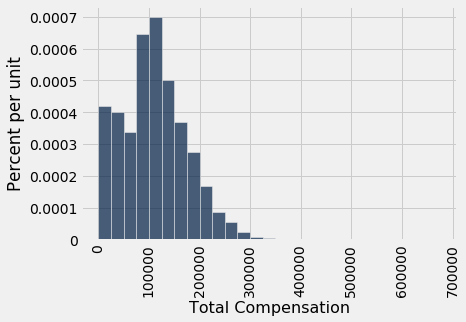

In [23]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

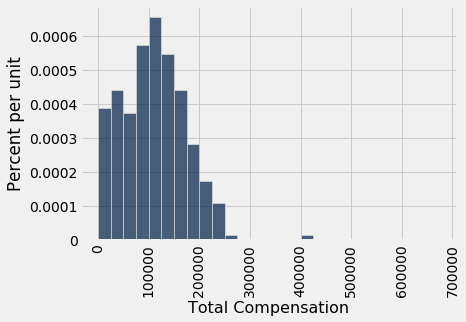

In [24]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [40]:
percentile(50, sf.sample(300, with_replacement=False).column('Total Compensation'))

102224.29

In [41]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = percentile(50, sf.sample(300, with_replacement=False).column('Total Compensation'))
    sample_medians = np.append(sample_medians, new_median)

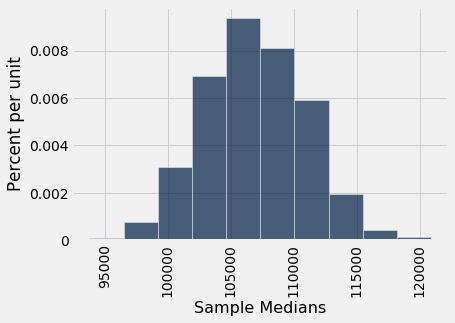

In [43]:
Table().with_column('Sample Medians', sample_medians).hist()